# Solver and Analysis for Partial Differential Equation
## Autor de esta sección: Sebastián Alí Sacasa Céspedes
### Correo correspondiente: sebastian.sacasa@ucr.ac.cr

=== ESTUDIO COMPLETO DEL MODELO SSH ===

--- Estudiando régimen: Topológico (v < w) ---
  Número de bobinado: -0.999
  Fase de Berry: 3.139
  Fase de Zak: 3.139
  Fase topológica: SÍ


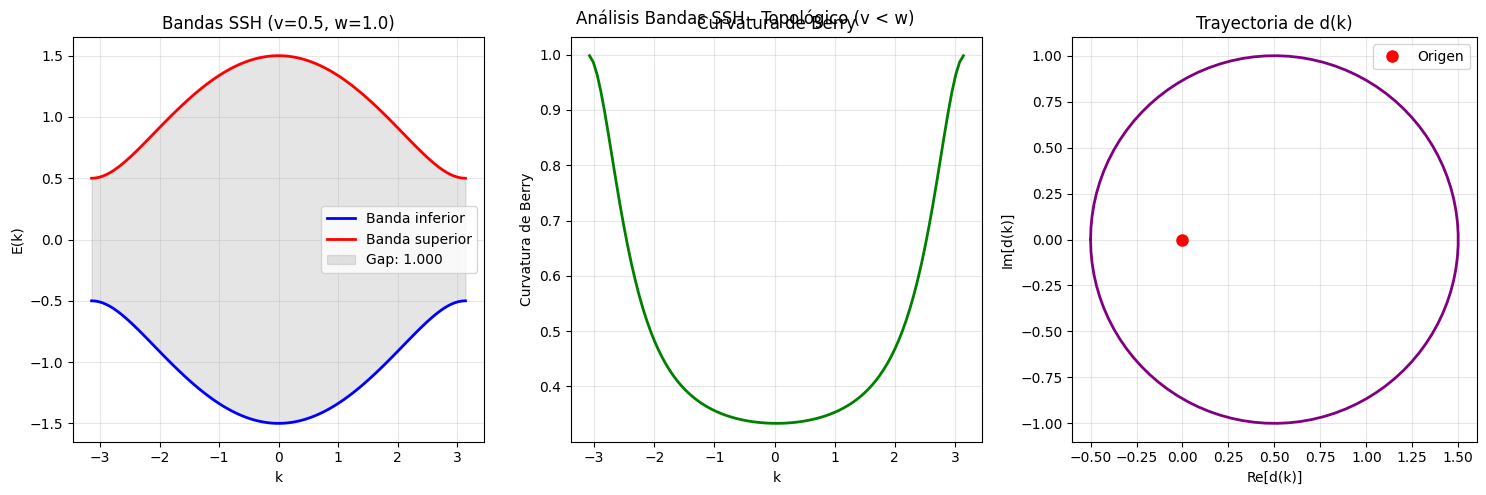

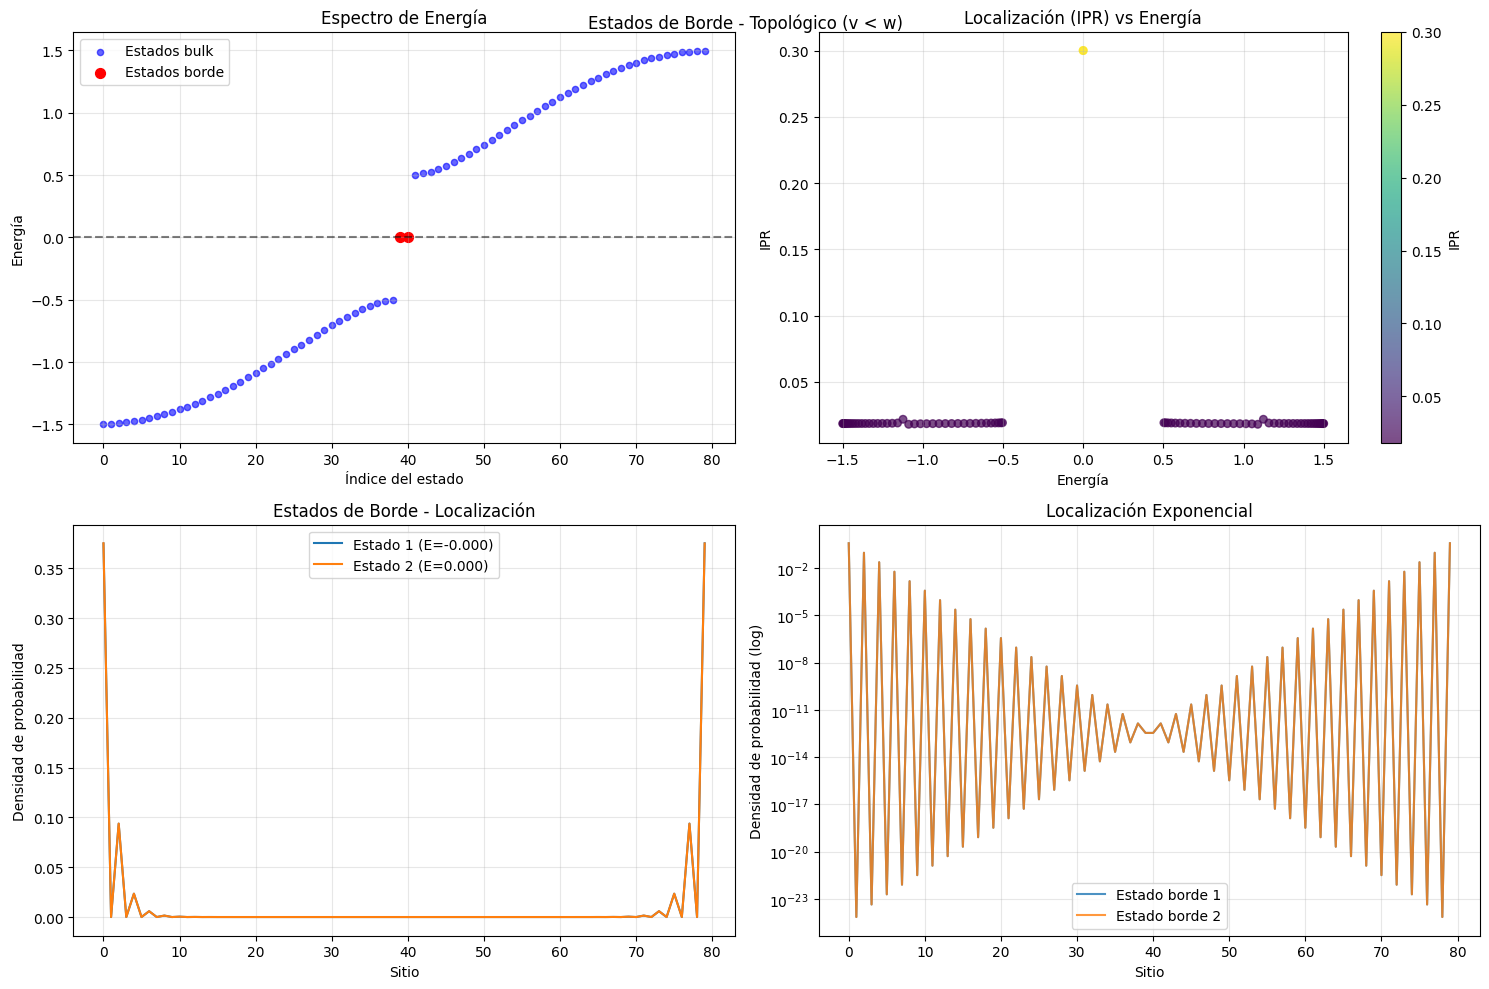


--- Estudiando régimen: Crítico (v = w) ---
  Número de bobinado: 0.000
  Fase de Berry: -0.002
  Fase de Zak: 6.282
  Fase topológica: NO


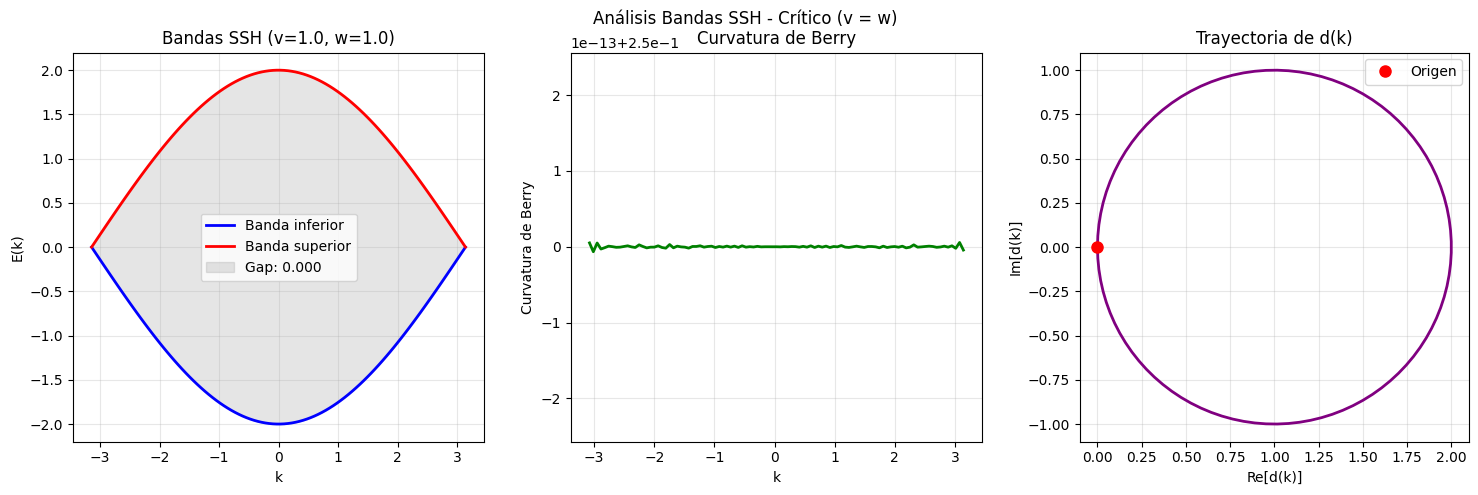

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


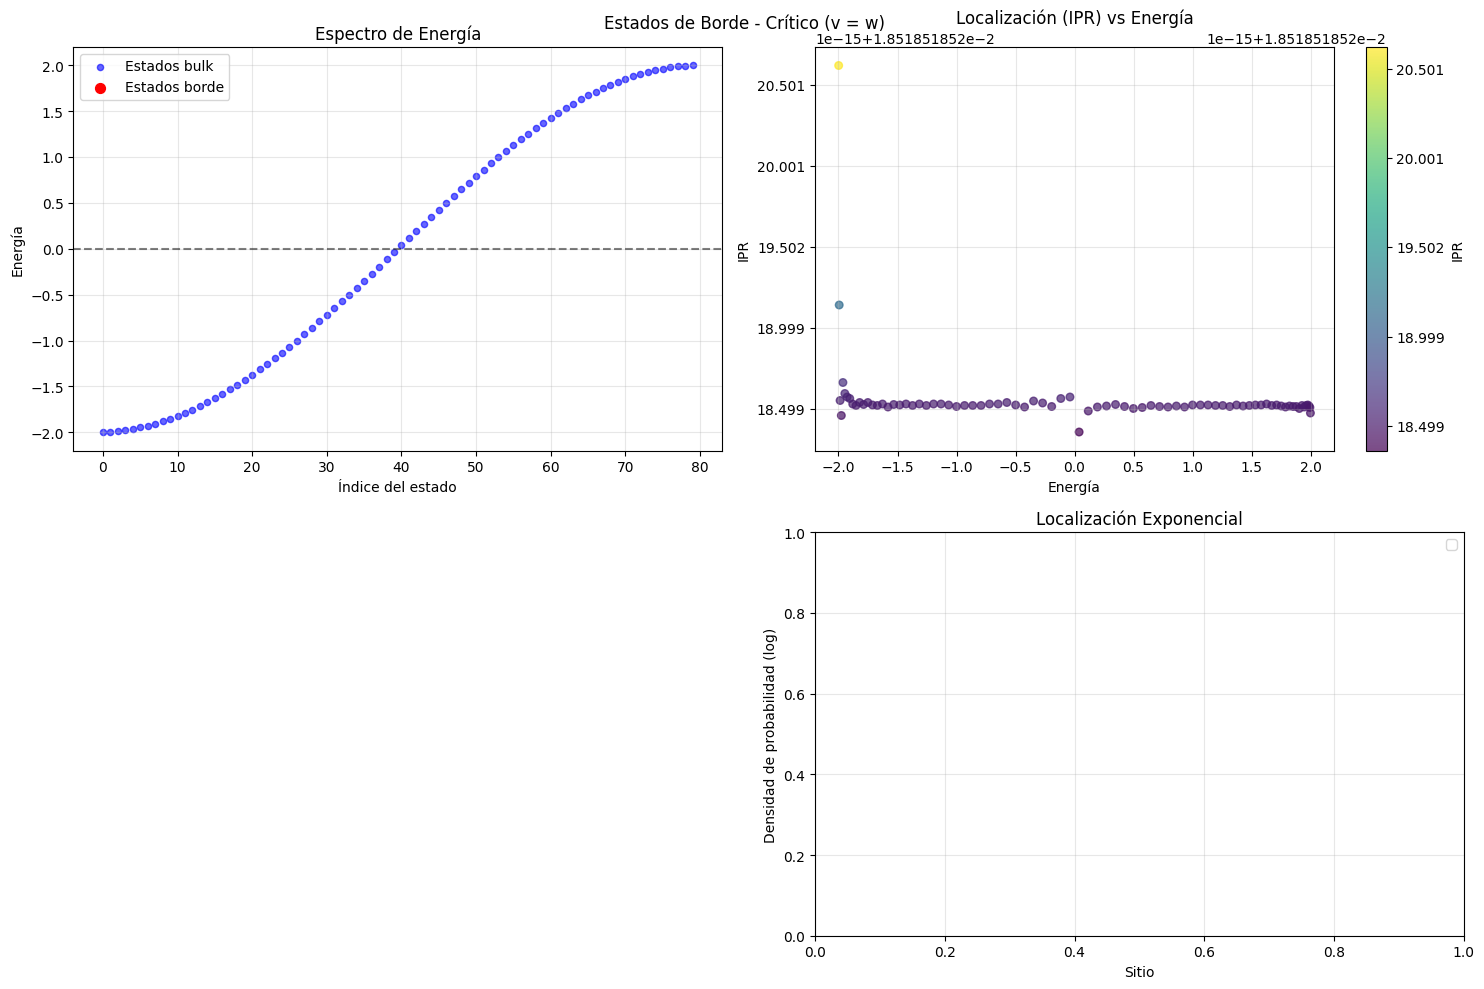


--- Estudiando régimen: Trivial (v > w) ---
  Número de bobinado: 0.000
  Fase de Berry: -0.001
  Fase de Zak: 6.282
  Fase topológica: NO


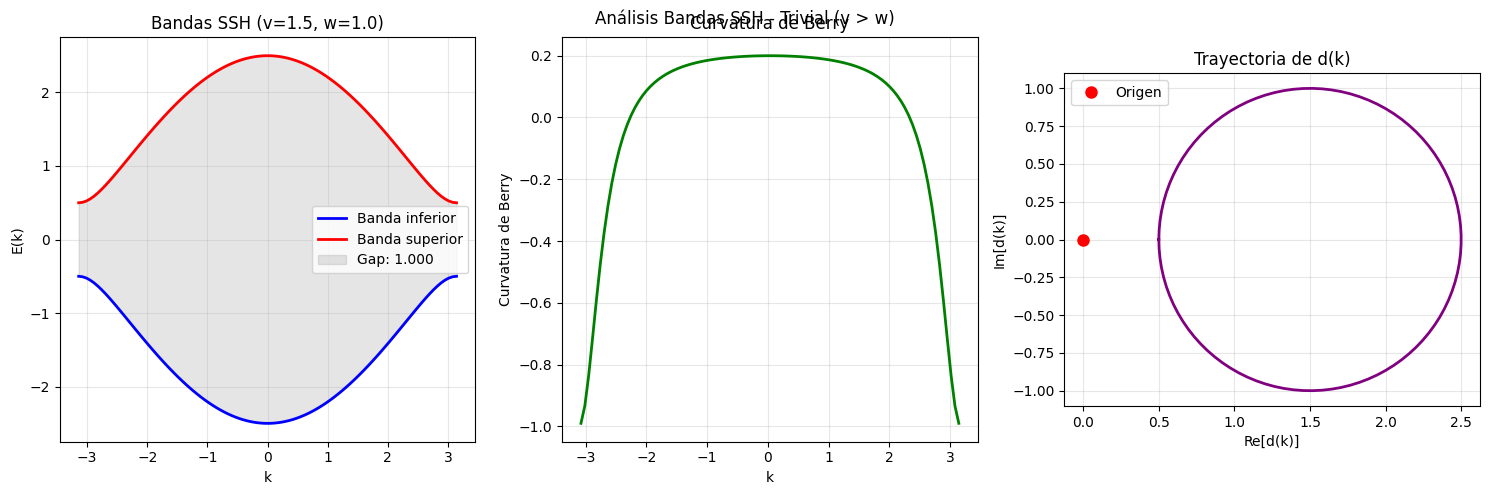

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


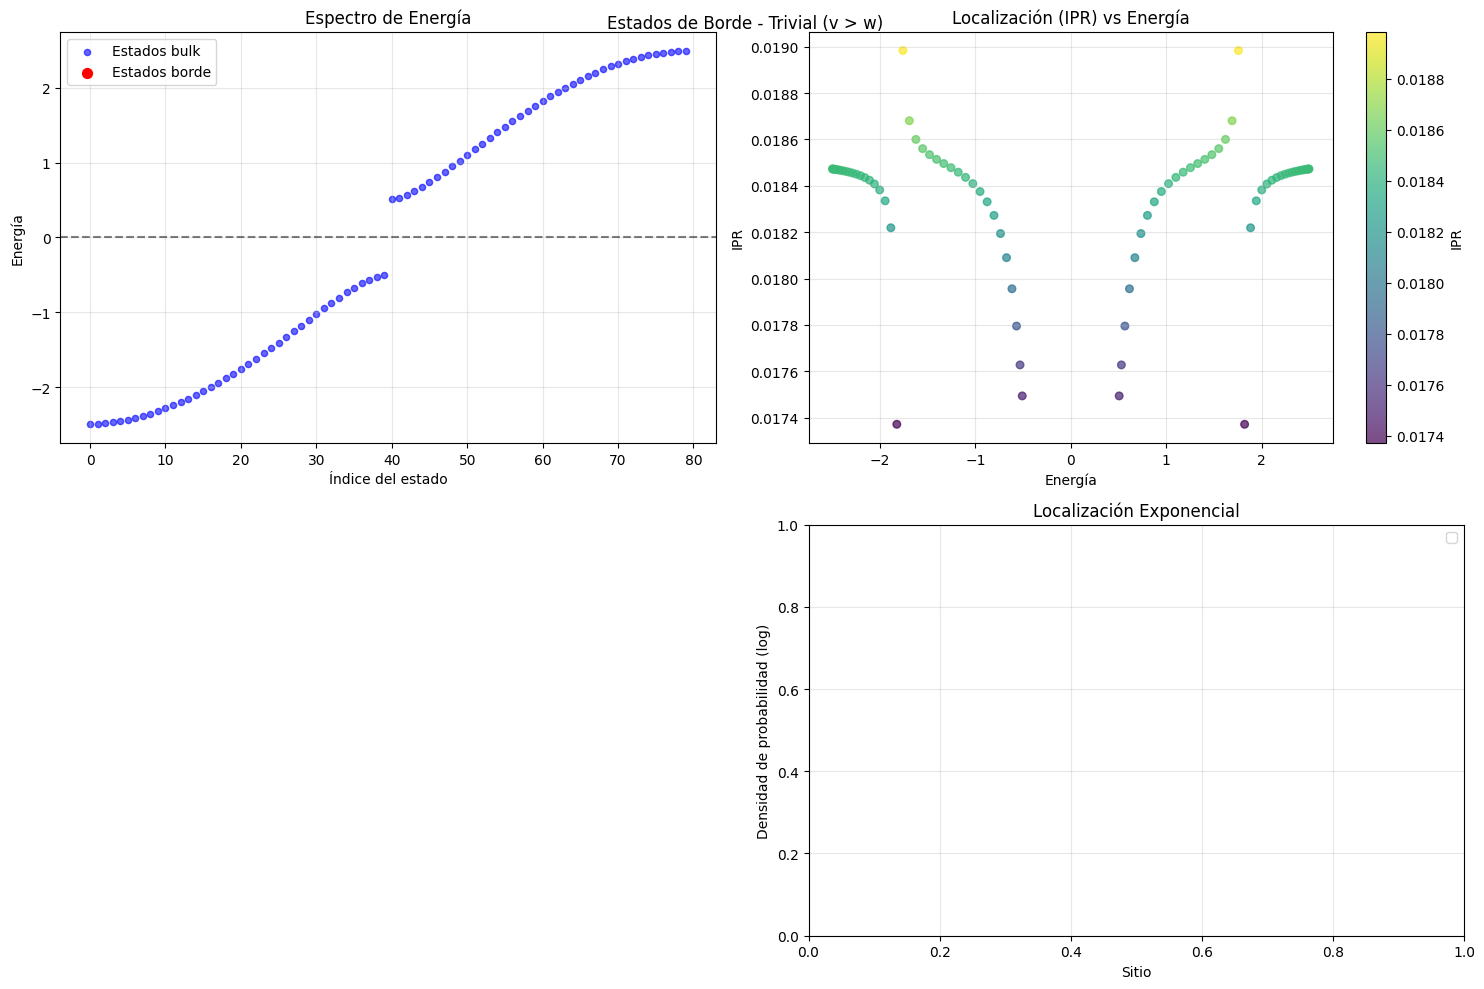


--- Generando Diagrama de Fases ---


Calculando diagrama de fases: 100%|██████████| 100/100 [00:10<00:00,  9.72it/s]


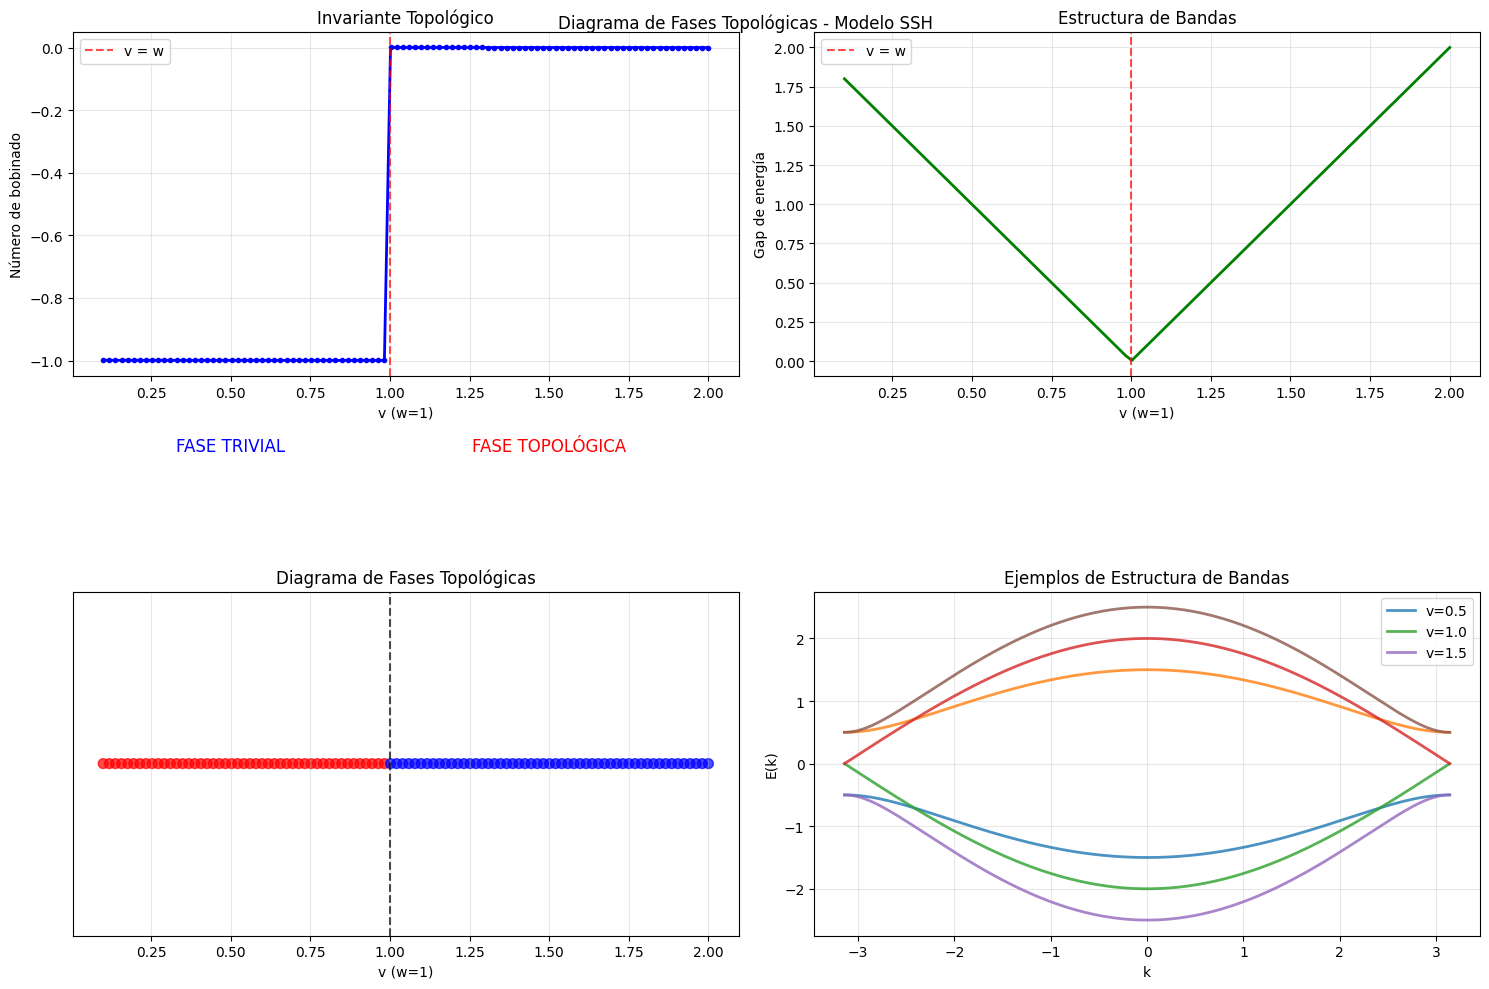


=== RESUMEN COMPARATIVO ===
Topológico (v < w):
  • Winding number: -0.999
  • Gap: 1.000
  • Estados borde: 2
  • Fase topológica: SÍ

Crítico (v = w):
  • Winding number: 0.000
  • Gap: 0.000
  • Estados borde: 0
  • Fase topológica: NO

Trivial (v > w):
  • Winding number: 0.000
  • Gap: 1.000
  • Estados borde: 0
  • Fase topológica: NO



In [1]:
"""
SSH Model Enhanced - Análisis topológico mejorado con visualizaciones avanzadas
Modelo de Su-Schrieffer-Heeger con estudio completo de transiciones de fase topológicas
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import scipy.sparse as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib import cm
from tqdm import tqdm

class SSHModelEnhanced:
    """
    Implementación mejorada del modelo SSH con análisis topológico avanzado,
    visualizaciones profesionales y estudio de invariantes topológicos.
    """
    
    def __init__(self, N_cells=50, v=1.0, w=1.0):
        self.N_cells = N_cells
        self.v = v
        self.w = w
        self.dim = 2 * N_cells
        
    def build_finite_hamiltonian(self):
        """Hamiltoniano para cadena finita con condiciones abiertas"""
        H = sp.dok_matrix((self.dim, self.dim), dtype=complex)
        
        for i in range(self.N_cells):
            A_idx = 2 * i
            B_idx = 2 * i + 1
            
            # Enlace intra-celda (v)
            H[A_idx, B_idx] = self.v
            H[B_idx, A_idx] = self.v
            
            # Enlace inter-celda (w)
            if i < self.N_cells - 1:
                next_A_idx = 2 * (i + 1)
                H[B_idx, next_A_idx] = self.w
                H[next_A_idx, B_idx] = self.w
        
        return H.tocsr()
    
    def build_infinite_hamiltonian_k(self, k):
        """Hamiltoniano en espacio de momentos para sistema infinito"""
        H_k = np.zeros((2, 2), dtype=complex)
        H_k[0, 1] = self.v + self.w * np.exp(-1j * k)
        H_k[1, 0] = np.conj(H_k[0, 1])
        return H_k
    
    def calculate_band_structure(self, k_points=200):
        """Estructura de bandas con cálculo de curvatura de Berry"""
        k_values = np.linspace(-np.pi, np.pi, k_points)
        energies = np.zeros((len(k_values), 2))
        berry_curvature = np.zeros(len(k_values))
        
        for i, k in enumerate(k_values):
            H_k = self.build_infinite_hamiltonian_k(k)
            eigvals, eigvecs = eigh(H_k)
            energies[i] = eigvals
            
            # Calcular conexión de Berry
            if i > 0:
                # Producto interno entre estados vecinos
                overlap = np.vdot(eigvecs[:, 0], prev_eigvecs[:, 0])
                berry_curvature[i] = -np.angle(overlap) / (k_values[i] - k_values[i-1])
            
            prev_eigvecs = eigvecs
        
        return k_values, energies, berry_curvature
    
    def calculate_topological_invariants(self, k_points=1000):
        """Calcula múltiples invariantes topológicos"""
        k_values = np.linspace(0, 2*np.pi, k_points, endpoint=False)
        
        # Número de bobinado tradicional
        winding = self._calculate_winding_number(k_values)
        
        # Fase de Berry
        berry_phase = self._calculate_berry_phase(k_values)
        
        # Polarización de Zak
        zak_phase = self._calculate_zak_phase(k_values)
        
        return {
            'winding_number': winding,
            'berry_phase': berry_phase,
            'zak_phase': zak_phase,
            'topological_phase': abs(winding) > 0.5
        }
    
    def _calculate_winding_number(self, k_values):
        """Calcula número de bobinado mejorado"""
        dk = k_values[1] - k_values[0]
        total_phase = 0
        prev_phase = np.angle(self.v + self.w * np.exp(-1j * k_values[0]))
        
        for k in k_values[1:]:
            h_k = self.v + self.w * np.exp(-1j * k)
            current_phase = np.angle(h_k)
            
            phase_diff = current_phase - prev_phase
            if phase_diff > np.pi:
                phase_diff -= 2 * np.pi
            elif phase_diff < -np.pi:
                phase_diff += 2 * np.pi
                
            total_phase += phase_diff
            prev_phase = current_phase
        
        return total_phase / (2 * np.pi)
    
    def _calculate_berry_phase(self, k_values):
        """Calcula fase de Berry para la banda inferior"""
        berry_phase = 0
        prev_eigvec = None
        
        for k in k_values:
            H_k = self.build_infinite_hamiltonian_k(k)
            eigvals, eigvecs = eigh(H_k)
            
            if prev_eigvec is not None:
                overlap = np.vdot(eigvecs[:, 0], prev_eigvec)
                berry_phase += -np.imag(np.log(overlap))
            
            prev_eigvec = eigvecs[:, 0]
        
        return berry_phase
    
    def _calculate_zak_phase(self, k_values):
        """Calcula fase de Zak (polarización eléctrica)"""
        zak_phase = 0
        u_prev = None
        
        for k in k_values:
            H_k = self.build_infinite_hamiltonian_k(k)
            eigvals, eigvecs = eigh(H_k)
            u_k = eigvecs[:, 0]  # Estado de Bloch
            
            if u_prev is not None:
                overlap = np.vdot(u_k, u_prev)
                zak_phase += -np.imag(np.log(overlap))
            
            u_prev = u_k
        
        return zak_phase % (2 * np.pi)
    
    def diagonalize_finite_chain(self):
        """Diagonalización con análisis de localización"""
        H_finite = self.build_finite_hamiltonian()
        eigenvalues, eigenvectors = eigh(H_finite.todense())
        
        # Calcular IPR (Inverse Participation Ratio) para medir localización
        ipr_values = np.zeros(self.dim)
        for i in range(self.dim):
            psi = eigenvectors[:, i]
            ipr_values[i] = np.sum(np.abs(psi)**4) / (np.sum(np.abs(psi)**2))**2
        
        return eigenvalues, eigenvectors, ipr_values
    
    def find_edge_states(self, eigenvectors, eigenvalues, energy_tol=1e-3):
        """Identifica estados de borde con análisis de localización"""
        zero_energy_indices = np.where(np.abs(eigenvalues) < energy_tol)[0]
        edge_states = []
        
        for idx in zero_energy_indices:
            state = eigenvectors[:, idx]
            # Verificar si está localizado en los bordes
            edge_weight = (np.sum(np.abs(state[:5])**2) + 
                         np.sum(np.abs(state[-5:])**2)) / np.sum(np.abs(state)**2)
            
            if edge_weight > 0.3:  # Umbral de localización en bordes
                edge_states.append({
                    'state': state,
                    'energy': eigenvalues[idx],
                    'localization': edge_weight,
                    'index': idx
                })
        
        return edge_states

class SSHVisualizer:
    """Visualizador avanzado para el modelo SSH"""
    
    @staticmethod
    def plot_band_structure_3d(ssh_model, k_points=100):
        """Estructura de bandas 3D con información topológica"""
        k_values, energies, berry_curvature = ssh_model.calculate_band_structure(k_points)
        
        fig = plt.figure(figsize=(15, 5))
        
        # Subplot 1: Estructura de bandas tradicional
        ax1 = fig.add_subplot(131)
        ax1.plot(k_values, energies[:, 0], 'b-', linewidth=2, label='Banda inferior')
        ax1.plot(k_values, energies[:, 1], 'r-', linewidth=2, label='Banda superior')
        gap = np.min(energies[:, 1]) - np.max(energies[:, 0])
        ax1.fill_between(k_values, energies[:, 0], energies[:, 1], 
                        alpha=0.2, color='gray', label=f'Gap: {gap:.3f}')
        ax1.set_xlabel('k')
        ax1.set_ylabel('E(k)')
        ax1.set_title(f'Bandas SSH (v={ssh_model.v}, w={ssh_model.w})')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Subplot 2: Curvatura de Berry
        ax2 = fig.add_subplot(132)
        ax2.plot(k_values[1:], berry_curvature[1:], 'g-', linewidth=2)
        ax2.set_xlabel('k')
        ax2.set_ylabel('Curvatura de Berry')
        ax2.set_title('Curvatura de Berry')
        ax2.grid(True, alpha=0.3)
        
        # Subplot 3: Vector d(k) en el plano complejo
        ax3 = fig.add_subplot(133)
        d_vector = ssh_model.v + ssh_model.w * np.exp(-1j * k_values)
        ax3.plot(d_vector.real, d_vector.imag, 'purple', linewidth=2)
        ax3.plot(0, 0, 'ro', markersize=8, label='Origen')
        ax3.set_xlabel('Re[d(k)]')
        ax3.set_ylabel('Im[d(k)]')
        ax3.set_title('Trayectoria de d(k)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        plt.tight_layout()
        return fig, gap
    
    @staticmethod
    def plot_edge_states_analysis(ssh_model, energy_tol=1e-3):
        """Análisis completo de estados de borde"""
        eigenvalues, eigenvectors, ipr_values = ssh_model.diagonalize_finite_chain()
        edge_states = ssh_model.find_edge_states(eigenvectors, eigenvalues, energy_tol)
        
        fig = plt.figure(figsize=(15, 10))
        
        # Subplot 1: Espectro de energía con estados de borde resaltados
        ax1 = fig.add_subplot(221)
        all_indices = range(len(eigenvalues))
        edge_indices = [state['index'] for state in edge_states]
        bulk_indices = [i for i in all_indices if i not in edge_indices]
        
        ax1.scatter(bulk_indices, eigenvalues[bulk_indices], 
                   c='blue', alpha=0.6, label='Estados bulk', s=20)
        ax1.scatter(edge_indices, eigenvalues[edge_indices], 
                   c='red', alpha=1.0, label='Estados borde', s=50)
        ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax1.set_xlabel('Índice del estado')
        ax1.set_ylabel('Energía')
        ax1.set_title('Espectro de Energía')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Subplot 2: IPR vs Energía
        ax2 = fig.add_subplot(222)
        scatter = ax2.scatter(eigenvalues, ipr_values, c=ipr_values, 
                             cmap='viridis', alpha=0.7, s=30)
        ax2.set_xlabel('Energía')
        ax2.set_ylabel('IPR')
        ax2.set_title('Localización (IPR) vs Energía')
        plt.colorbar(scatter, ax=ax2, label='IPR')
        ax2.grid(True, alpha=0.3)
        
        # Subplot 3: Densidad de probabilidad de estados de borde
        if edge_states:
            ax3 = fig.add_subplot(223)
            for i, state_info in enumerate(edge_states):
                state = state_info['state']
                prob_density = np.abs(state)**2
                ax3.plot(range(ssh_model.dim), prob_density, 
                        label=f'Estado {i+1} (E={state_info["energy"]:.3f})')
            ax3.set_xlabel('Sitio')
            ax3.set_ylabel('Densidad de probabilidad')
            ax3.set_title('Estados de Borde - Localización')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
        
        # Subplot 4: Análisis de localización
        ax4 = fig.add_subplot(224)
        site_positions = np.arange(ssh_model.dim)
        if edge_states:
            for i, state_info in enumerate(edge_states):
                state = state_info['state']
                prob_density = np.abs(state)**2
                ax4.semilogy(site_positions, prob_density, 
                           label=f'Estado borde {i+1}', alpha=0.8)
        ax4.set_xlabel('Sitio')
        ax4.set_ylabel('Densidad de probabilidad (log)')
        ax4.set_title('Localización Exponencial')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig, edge_states
    
    @staticmethod
    def plot_phase_diagram(v_range=(0.1, 2.0), w=1.0, n_points=50, N_cells=30):
        """Diagrama de fases completo del modelo SSH"""
        v_values = np.linspace(v_range[0], v_range[1], n_points)
        winding_numbers = []
        gaps = []
        topological_phases = []
        
        for v in tqdm(v_values, desc="Calculando diagrama de fases"):
            ssh = SSHModelEnhanced(N_cells=N_cells, v=v, w=w)
            
            # Calcular invariantes topológicos
            invariants = ssh.calculate_topological_invariants()
            winding_numbers.append(invariants['winding_number'])
            topological_phases.append(invariants['topological_phase'])
            
            # Calcular gap
            k_vals, energies, _ = ssh.calculate_band_structure()
            gap = np.min(energies[:, 1]) - np.max(energies[:, 0])
            gaps.append(gap)
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Subplot 1: Número de bobinado
        axes[0, 0].plot(v_values, winding_numbers, 'b-', linewidth=2, marker='o', markersize=3)
        axes[0, 0].axvline(x=w, color='red', linestyle='--', alpha=0.7, label='v = w')
        axes[0, 0].set_xlabel('v (w=1)')
        axes[0, 0].set_ylabel('Número de bobinado')
        axes[0, 0].set_title('Invariante Topológico')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].legend()
        
        # Subplot 2: Gap de energía
        axes[0, 1].plot(v_values, gaps, 'g-', linewidth=2)
        axes[0, 1].axvline(x=w, color='red', linestyle='--', alpha=0.7, label='v = w')
        axes[0, 1].set_xlabel('v (w=1)')
        axes[0, 1].set_ylabel('Gap de energía')
        axes[0, 1].set_title('Estructura de Bandas')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].legend()
        
        # Subplot 3: Diagrama de fases
        phase_colors = ['red' if phase else 'blue' for phase in topological_phases]
        axes[1, 0].scatter(v_values, [1]*len(v_values), c=phase_colors, s=50, alpha=0.7)
        axes[1, 0].axvline(x=w, color='black', linestyle='--', alpha=0.7)
        axes[1, 0].set_xlabel('v (w=1)')
        axes[1, 0].set_yticks([])
        axes[1, 0].set_title('Diagrama de Fases Topológicas')
        axes[1, 0].text(0.5, 1.1, 'FASE TRIVIAL', ha='center', color='blue', fontsize=12)
        axes[1, 0].text(1.5, 1.1, 'FASE TOPOLÓGICA', ha='center', color='red', fontsize=12)
        axes[1, 0].grid(True, alpha=0.3)
        
        # Subplot 4: Ejemplos de bandas para diferentes fases
        example_v = [0.5, 1.0, 1.5]
        for i, v in enumerate(example_v):
            ssh = SSHModelEnhanced(N_cells=N_cells, v=v, w=w)
            k_vals, energies, _ = ssh.calculate_band_structure()
            
            axes[1, 1].plot(k_vals, energies[:, 0], 
                           label=f'v={v}', linewidth=2, alpha=0.8)
            axes[1, 1].plot(k_vals, energies[:, 1], 
                           linewidth=2, alpha=0.8)
        
        axes[1, 1].set_xlabel('k')
        axes[1, 1].set_ylabel('E(k)')
        axes[1, 1].set_title('Ejemplos de Estructura de Bandas')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig

def comprehensive_ssh_study():
    """
    Estudio completo y profesional del modelo SSH
    """
    print("=== ESTUDIO COMPLETO DEL MODELO SSH ===")
    
    # Configuración de parámetros
    regimes = [
        {'v': 0.5, 'w': 1.0, 'label': 'Topológico (v < w)'},
        {'v': 1.0, 'w': 1.0, 'label': 'Crítico (v = w)'},
        {'v': 1.5, 'w': 1.0, 'label': 'Trivial (v > w)'}
    ]
    
    results = {}
    visualizer = SSHVisualizer()
    
    for regime in regimes:
        print(f"\n--- Estudiando régimen: {regime['label']} ---")
        
        # Crear modelo
        ssh = SSHModelEnhanced(N_cells=40, v=regime['v'], w=regime['w'])
        
        # Calcular invariantes topológicos
        invariants = ssh.calculate_topological_invariants()
        print(f"  Número de bobinado: {invariants['winding_number']:.3f}")
        print(f"  Fase de Berry: {invariants['berry_phase']:.3f}")
        print(f"  Fase de Zak: {invariants['zak_phase']:.3f}")
        print(f"  Fase topológica: {'SÍ' if invariants['topological_phase'] else 'NO'}")
        
        # Visualizaciones
        fig_bands, gap = visualizer.plot_band_structure_3d(ssh)
        plt.suptitle(f"Análisis Bandas SSH - {regime['label']}")
        plt.show()
        
        fig_edges, edge_states = visualizer.plot_edge_states_analysis(ssh)
        plt.suptitle(f"Estados de Borde - {regime['label']}")
        plt.show()
        
        results[regime['label']] = {
            'invariants': invariants,
            'gap': gap,
            'edge_states_count': len(edge_states)
        }
    
    # Diagrama de fases completo
    print("\n--- Generando Diagrama de Fases ---")
    fig_phase = visualizer.plot_phase_diagram(v_range=(0.1, 2.0), n_points=100)
    plt.suptitle("Diagrama de Fases Topológicas - Modelo SSH")
    plt.show()
    
    # Resumen final
    print("\n=== RESUMEN COMPARATIVO ===")
    for regime_name, result in results.items():
        print(f"{regime_name}:")
        print(f"  • Winding number: {result['invariants']['winding_number']:.3f}")
        print(f"  • Gap: {result['gap']:.3f}")
        print(f"  • Estados borde: {result['edge_states_count']}")
        print(f"  • Fase topológica: {'SÍ' if result['invariants']['topological_phase'] else 'NO'}")
        print()

if __name__ == "__main__":
    comprehensive_ssh_study()